In [1]:
import tensorflow as tf
print(tf.__version__)
#!pip install tensorflow==2.0.0-alpha0

2.0.0-alpha0


In [0]:
with open('poetry.txt') as f:
  poem = f.read()
poem = poem.lower()
poem = poem.split('\n')

NameError: ignored

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(poem)

In [0]:
word_index = tokenizer.word_index
vocab_len = len(word_index)+1
max_length = max([len(x.split()) for x in poem])
embedding_dim = 64
oov_tok = "<OOV>"
pad_type = 'pre'
trunc_type = 'pre'

In [0]:
train = []
for sentence in poem:
  sen_split = sentence.split()
  for i in range(1,len(sen_split)):
    pre_sentence = " ".join(sen_split[:i+1])
    train.append(pre_sentence)

In [26]:
import numpy as np
sequences = tokenizer.texts_to_sequences(train)
sequences[0:10]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361]]

In [0]:
padded_final = np.array(pad_sequences(sequences,maxlen = max_length,padding=pad_type,truncating=trunc_type))
xs = padded_final[:,:-1]
labels = padded_final[:,-1]
ys = tf.keras.utils.to_categorical(labels,num_classes=vocab_len)

In [41]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_len,embedding_dim))
model.add(tf.keras.layers.Conv1D(1024,5,activation='relu'))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dense(32,activation = 'relu'))
model.add(tf.keras.layers.Dense(vocab_len,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          172160    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 1024)        328704    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                32800     
_________________________________________________________________
dense_11 (Dense)             (None, 2690)              88770     
Total params: 622,434
Trainable params: 622,434
Non-trainable params: 0
_________________________________________________________________


In [42]:
num_epochs = 500
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xs,ys,epochs=num_epochs)

Epoch 1/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 6.8158 - accuracy: 0.0615
Epoch 2/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 6.3640 - accuracy: 0.0660
Epoch 3/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 6.1963 - accuracy: 0.0707
Epoch 4/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 6.0159 - accuracy: 0.0784
Epoch 5/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 5.8288 - accuracy: 0.0863
Epoch 6/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 5.6446 - accuracy: 0.0980
Epoch 7/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 5.4557 - accuracy: 0.1107
Epoch 8/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 5.2736 - accuracy: 0.1245
Epoch 9/500
11976/11976 [==============================] - 26s 2ms/sample - loss: 5.0852 - accuracy: 0.1403
Epoch 10/500
11976/11976 [==

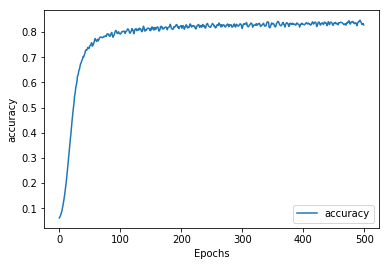

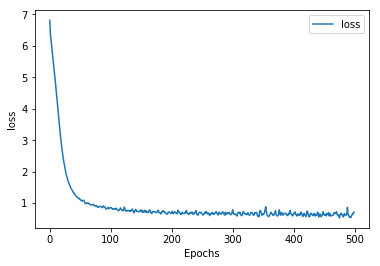

In [43]:
import matplotlib.pyplot as plt
def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string])
  plt.show()
  
plot_graph(model.history,'accuracy')
plot_graph(model.history,'loss')

In [0]:
rev=dict()
for (word,key) in word_index.items():
  rev[key]=word

In [45]:
test = "Kissed the loved ones and the friends we would"
next_words = 100
for loop_key in range(next_words):
  seq=tokenizer.texts_to_sequences([test])[0]
  pad = pad_sequences([seq],maxlen=max_length,padding='pre',truncating = 'pre')
  predicted = model.predict_classes(pad,verbose=0)
  test = test+" "+rev[predicted[0]]
test

'Kissed the loved ones and the friends we would neer see again again still home home home still still home home die of the town of spire shut rapier'

array([163])

'and'

In [40]:
rev[predicted[0]]

'ran'